<a href="https://colab.research.google.com/github/MorganLee0906/self_study/blob/main/history/20210428_ver2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

輸入看板名稱:stock
輸入日期(僅會查詢該日期以後的文章)(mm dd)04 28
搜尋推文數高於多少(<0則搜噓文數)的文章:10
 4/28	爆	[閒聊] 2021/04/28 盤中閒聊
 4/22	44	Fw: [活動] PTT422 地球日大動員 看板EarthDay2021
 4/15	爆	[閒聊] 四月板務討論文 (周末可回文)
 4/28	11	Re: [標的] 9955佳龍
 4/28	23	[請益] 怎麼停止幻想大盤會回檔修正？
 4/28	27	[標的]  2603 長榮 反指標空
 4/28	32	Re: [標的] 6116彩晶
 4/28	26	[新聞] 110億美元天價遺產稅！三星李家宣布全繳
 4/28	20	Re: [新聞] 旺宏談市況 「好到不敢相信」
 4/28	80	[新聞] 旺宏談市況 「好到不敢相信」
 4/28	39	[新聞] 大逆轉！辜仲諒陷「紅火案」纏訟15年　更二審改判無罪
 4/28	10	[標的] 杰力5299 多
 4/28	24	[標的] 2108 南帝 難波萬多
 4/28	19	[新聞] 中國鋁業Q1淨利飆升超過30倍，營收年增約
 4/28	12	[新聞] 《鋼鐵股》銷售、鋼價UP 新光鋼今年營運
 4/28	20	[標的] 福懋 (營運回升多)
 4/28	爆	[標的] 陽明 空
 4/28	43	Re: [心得] 關於股版風氣
 4/28	12	[其他] 重複扣款-國泰世華證券定期定額
 4/28	29	[請益]  新台幣不拉尾盤了嗎
 4/28	31	[標的] 1409 新纖
 4/28	爆	[請益] 臺慶科還有救嗎？
 4/28	22	[其他] 目前海運三雄 注意 整理
 4/28	27	[新聞] 因應全球鐵礦砂價格狂飆 中鋼協：加大開
 4/28	18	[新聞] 東奧照辦 15檔概念股走強
 4/28	11	[新聞] Alphabet Q1獲利連兩季破紀錄，宣布回購
 4/28	11	Re: [心得] 關於股版風氣
 4/28	99	本文章已被刪除
 4/28	83	[閒聊] 2021/04/28 盤中閒聊
 4/28	10	Re: [心得] 關於股版風氣


Building prefix dict from /content/drive/MyDrive/Colab Notebooks/python 爬蟲/dict.txt.big ...
Loading model from cache /tmp/jieba.u2fa281215d2cb91d78281e43ee45e2f8.cache


 4/28	52	[新聞] 獨家》聯電將由6家客戶出錢擴28奈米產能
 4/28	22	[新聞] 兆豐金擬發每股現金股利1.58元　殖利率4.
 4/28	66	Re: [請益] 怎麼抓到題材股？
 4/28	27	[新聞] 台積震撼彈！減碳列採購指標 供應商2030
 4/28	20	[新聞] 戴琪會見輝瑞、AZ高管 商討放棄武肺專利
 4/28	19	[請益] 權證履約問題
 4/28	11	Re: [其他] 上次說航運股一買套10年的去哪啦
 4/28	45	Re: [心得] 關於股版風氣
 4/28	19	[請益] 簡單的自動下單程式?
 4/28	13	Re: [心得] 關於股版風氣
 4/28	55	[新聞] 接種新冠疫苗後性慾爆棚！85歲老翁1hr激
 4/28	18	[標的]  換艘船 開更遠 中遠海控？


Loading model cost 1.387 seconds.
Prefix dict has been built successfully.


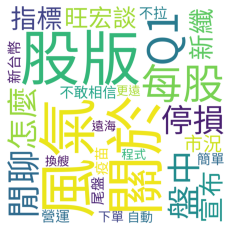

In [3]:
#ptt文章查詢器
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud
import requests
import jieba
import matplotlib.pyplot as plt

f = open('article.txt','w',encoding='UTF-8')
f.write('')
f.close()
s = requests.session()
#s.post('https://www.ptt.cc/ask/over18', data = {'from': '/bbs/Gossiping/index.html', 'yes': 'yes'})
next_page_url = 'https://www.ptt.cc/bbs/'+input('輸入看板名稱:')+'/index.html'
mm_min , dd_min = map(int,input('輸入日期(僅會查詢該日期以後的文章)(mm dd)').split(' '))
val_min = int(input('搜尋推文數高於多少(<0則搜噓文數)的文章:'))
if next_page_url == 'https://www.ptt.cc/bbs/gossiping/index.html' or next_page_url =='https://www.ptt.cc/bbs/Gossiping/index.html':
  s.post('https://www.ptt.cc/ask/over18', data = {'from': '/bbs/Gossiping/index.html', 'yes': 'yes'})
date_flag = True
count = 0
while date_flag:
  count += 1
  res = s.get(next_page_url)
  #print(res.text)
  soup = bs(res.text, 'html.parser')
  div_tags = soup.find_all('div', {'class': 'title'})
  val_tags = soup.find_all('div', {'class': 'nrec'})
  date_tags = soup.find_all('div', {'class': 'date'})
  btn = soup.select('div.btn-group > a')
  up_page_href = btn[3]['href']
  article_list = []
  pushval_list = []
  artinfo_list = []
  for val_tag in val_tags:
    num_tag= val_tag.find('span')
    #print(num_tag)
    if num_tag is None:
      pushval_list.append(0)
    else:
      pushval_list.append(num_tag.text)
  #f = open('article.txt','a',encoding='UTF-8')
  for div_tag in div_tags:
    a_tag = div_tag.find('a')
    if a_tag is not None:
      article_list.append(a_tag.text)
      #f.write(a_tag.text+'\n')
    else:
      article_list.append('本文章已被刪除')
  f.close()
  for date_tag in date_tags:
    #print(date_tag)
    d_tag = date_tag.get_text()
    artinfo_list.append(d_tag)
  article_list.reverse()
  pushval_list.reverse()
  artinfo_list.reverse()
  f = open('article.txt','a',encoding='UTF-8')
  for date,val,title in zip(artinfo_list,pushval_list,article_list):
    #print(val,type(val))
    if title !='本文章已被刪除':
      appe = title[(title.find(']')+1):]
    f.write(appe+'\n')

    m,d = map(int,date.split('/'))
    #print(m,d)
    if (m<mm_min or (m == mm_min and d < dd_min)) and count!=1:
      date_flag = False
      break
    if type(val) == str:
      if val == '爆':
        val = 100
      elif val[0] == 'X':
        if val == 'XX':
          val = int(-100)
        else: 
          val = int(val[1])*-10
      val = int(val)
      #print(val)
    if val_min>=0:
      if val>=val_min:
        if (val == 100):
          print(date,'爆',title,sep = '\t')
        else:
          print(date,val,title,sep = '\t')
    else:
      if val<=val_min:
        if (val == -100):
          print(date,'XX',title,sep = '\t')
        else:
          print(date,('X'+str(int(val/-10))),title,sep = '\t')
  f.close()
  if (date_flag) == False:
    break
  next_page_url = 'https://www.ptt.cc' + up_page_href

with open('article.txt','r',encoding = 'UTF-8') as rfile:
  text = rfile.read()
jieba.set_dictionary('/content/drive/MyDrive/Colab Notebooks/python 爬蟲/dict.txt.big')
wlist = jieba.cut(text)
words = " ".join(wlist)
wc = WordCloud(width = 1080,height = 1080,scale = 3,min_font_size=50,max_font_size=300,background_color='white',collocations=False,font_path='/content/drive/MyDrive/Colab Notebooks/python 爬蟲/SourceHanSansTW-Regular.otf').generate(words)
plt.imshow(wc)
plt.axis("off")
plt.show()